----------------------------------
# R lang and Gene-level differential expression analysis using DESeq2


In [6]:
library(tidyverse)

In [7]:
library(RColorBrewer)

In [10]:
# library(DESeq2)
# !pip install bioconductor-deseq2
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [11]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘SparseArray’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocParallel’


Old packages: 'httr2', 'later', 'promises', 'usethis'



In [12]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:lubridate’:

    second, second<-




In [14]:
# ... (rest of your code)
# Install and load pheatmap
if (!require("pheatmap", quietly = TRUE)) {
  BiocManager::install("pheatmap")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'pheatmap'

Old packages: 'httr2', 'later', 'promises', 'usethis'



In [15]:
library(pheatmap)

In [17]:
# Install DEGreport using BiocManager
if (!require("DEGreport", quietly = TRUE)) {
  BiocManager::install("DEGreport")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'DEGreport'

also installing the dependencies ‘rjson’, ‘iterators’, ‘gridExtra’, ‘statmod’, ‘GlobalOptions’, ‘shape’, ‘GetoptLong’, ‘clue’, ‘png’, ‘foreach’, ‘doParallel’, ‘ALL’, ‘viridis’, ‘limma’, ‘mnormt’, ‘GPArotation’, ‘plyr’, ‘circlize’, ‘ComplexHeatmap’, ‘cowplot’, ‘ConsensusClusterPlus’, ‘dendextend’, ‘edgeR’, ‘ggdendro’, ‘ggrepel’, ‘logging’, ‘psych’, ‘reshape’


Old packages: 'httr2', 'later', 'promises', 'usethis'



In [18]:
library(DEGreport)

In [21]:


## Load in data

data <- read.table("data/Mov10_full_counts.txt", header=T, row.names=1)

meta <- read.table("meta/Mov10_full_meta.txt", header=T, row.names=1)

### Check classes of the data we just brought in
class(meta)
class(data)

View(meta)

[1] "data.frame"

[1] "data.frame"

,sampletype,MOVexpr
,<chr>,<chr>
Mov10_kd_2,MOV10_knockdown,low
Mov10_kd_3,MOV10_knockdown,low
Mov10_oe_1,MOV10_overexpression,high
Mov10_oe_2,MOV10_overexpression,high
Mov10_oe_3,MOV10_overexpression,high
Irrel_kd_1,control,normal
Irrel_kd_2,control,normal
Irrel_kd_3,control,normal


In [22]:
View(data)

,Mov10_kd_2,Mov10_kd_3,Mov10_oe_1,Mov10_oe_2,Mov10_oe_3,Irrel_kd_1,Irrel_kd_2,Irrel_kd_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1/2-SBSRNA4,57,41,64,55,38,45,31,39
A1BG,71,40,100,81,41,77,58,40
A1BG-AS1,256,177,220,189,107,213,172,126
A1CF,0,1,1,0,0,0,0,0
A2LD1,146,81,138,125,52,91,80,50
A2M,10,9,2,5,2,9,8,4
A2ML1,3,2,6,5,2,2,1,0
A2MP1,0,0,2,1,3,0,2,1
A4GALT,56,37,107,118,65,49,52,37


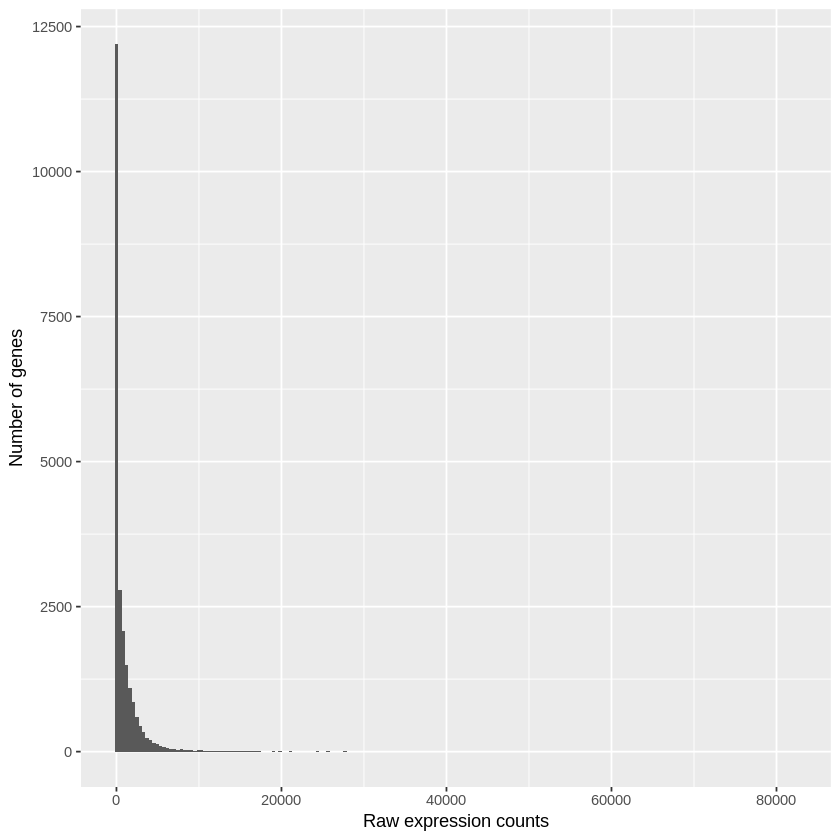

In [24]:
library(ggplot2)
ggplot(data) +
  geom_histogram(aes(x = Mov10_oe_1), stat = "bin", bins = 200) +
  xlab("Raw expression counts") +
  ylab("Number of genes")

Warning message:
“Removed 9121 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


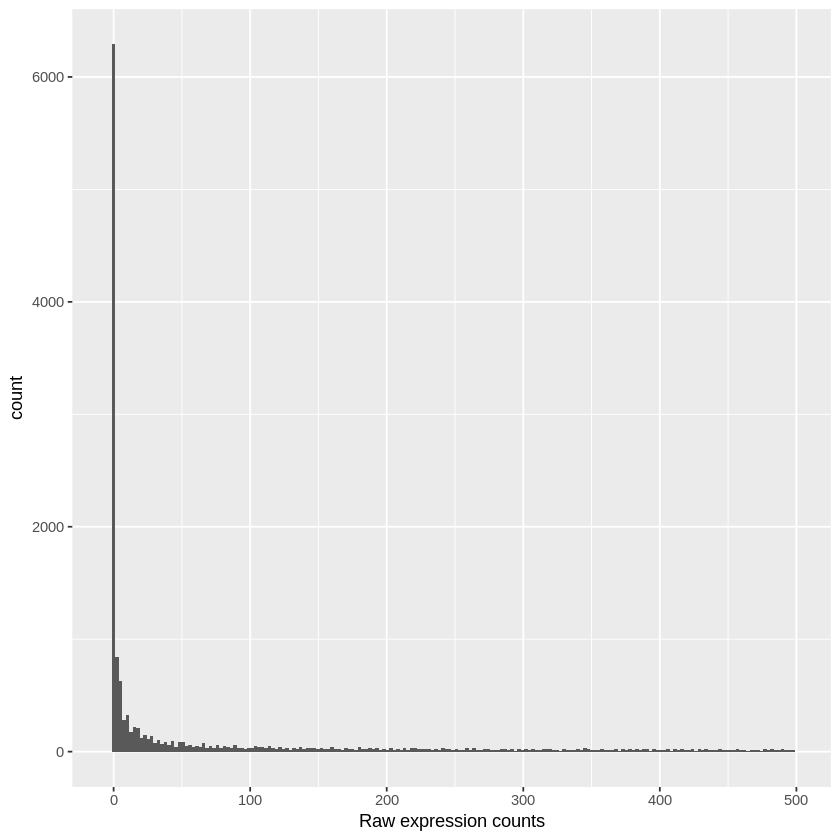

In [26]:
ggplot(data) +
  geom_histogram(aes(x = Mov10_oe_1), stat = "bin", bins = 200) +
  xlim(-5, 500)  +
  xlab("Raw expression counts")

In [27]:
mean_counts <- apply(data[,6:8], 1, mean)        #The second argument '1' of 'apply' function indicates the function being applied to rows. Use '2' if applied to columns
variance_counts <- apply(data[,6:8], 1, var)
df <- data.frame(mean_counts, variance_counts)

Warning message in scale_y_log10(limits = c(1, 1e+09)):
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10(limits = c(1, 1e+09)):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 1780 rows containing missing values or values outside the scale range
(`geom_point()`).”


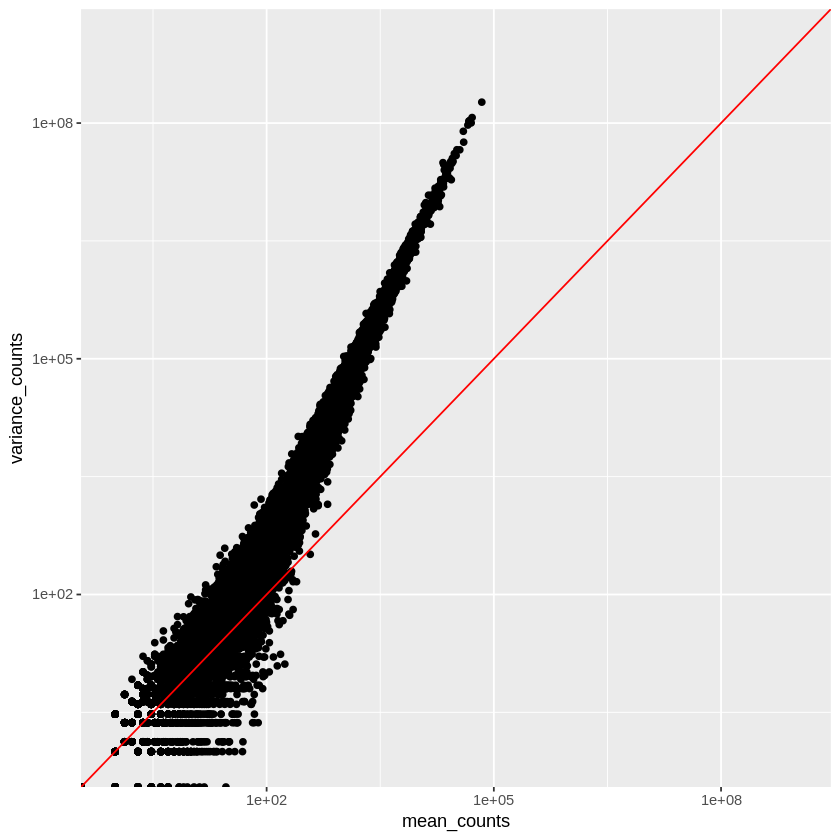

In [28]:
ggplot(df) +
  geom_point(aes(x=mean_counts, y=variance_counts)) +
  scale_y_log10(limits = c(1,1e9)) +
  scale_x_log10(limits = c(1,1e9)) +
  geom_abline(intercept = 0, slope = 1, color="red")